[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rikkicasupanan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


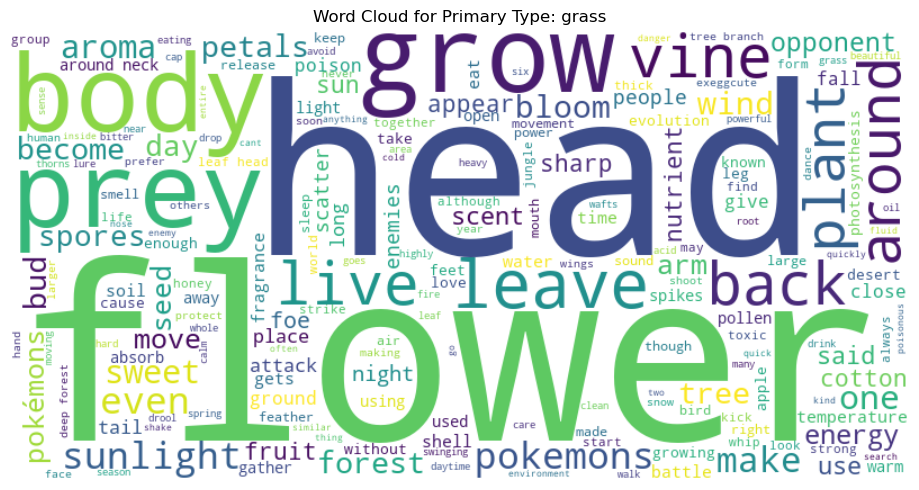

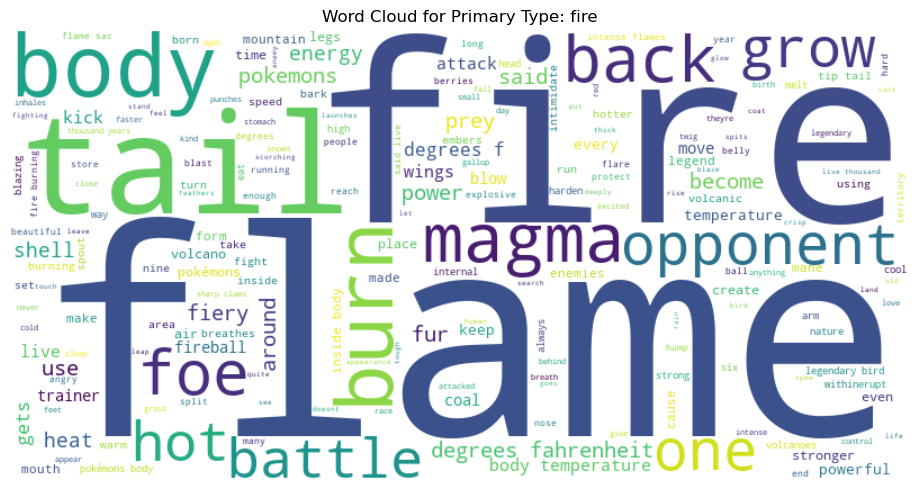

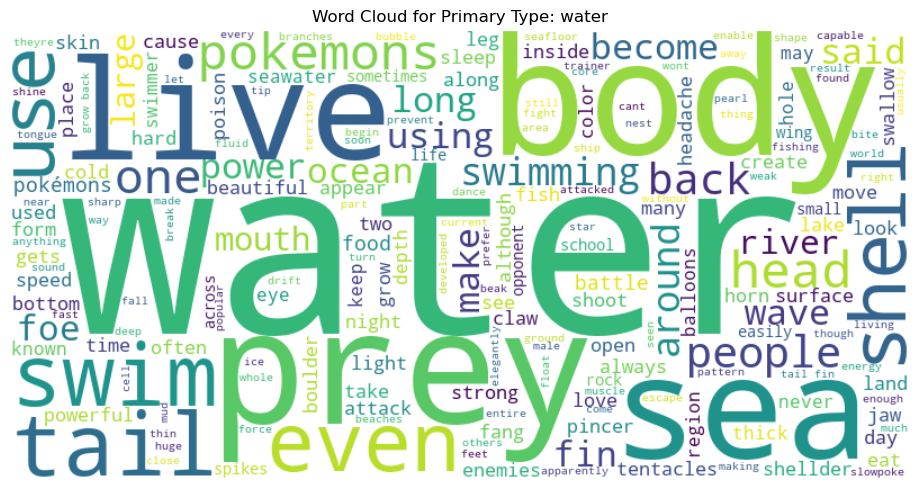

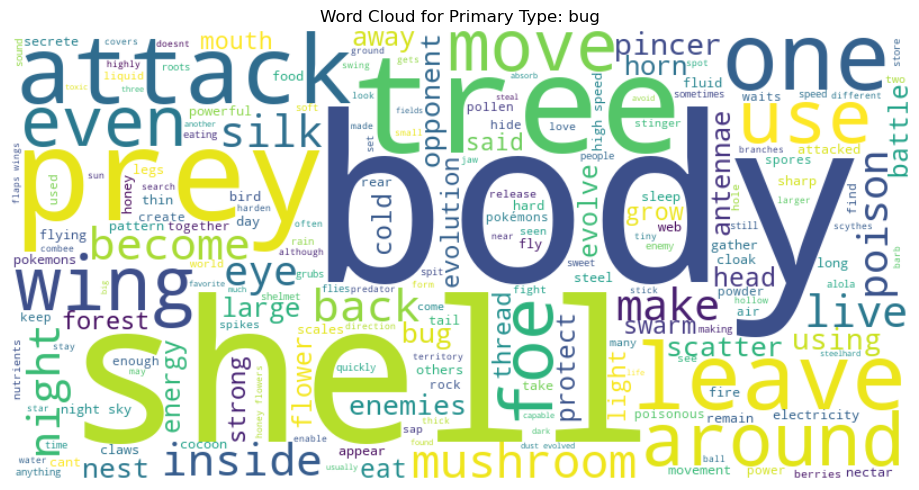

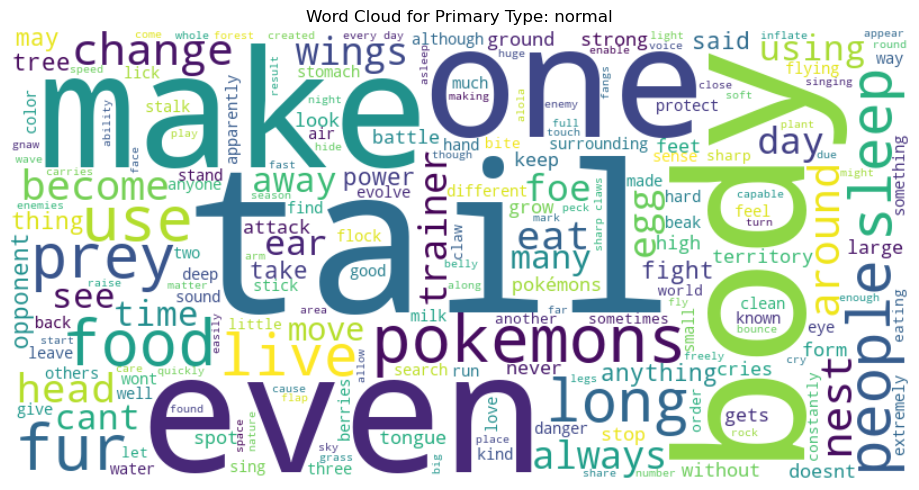

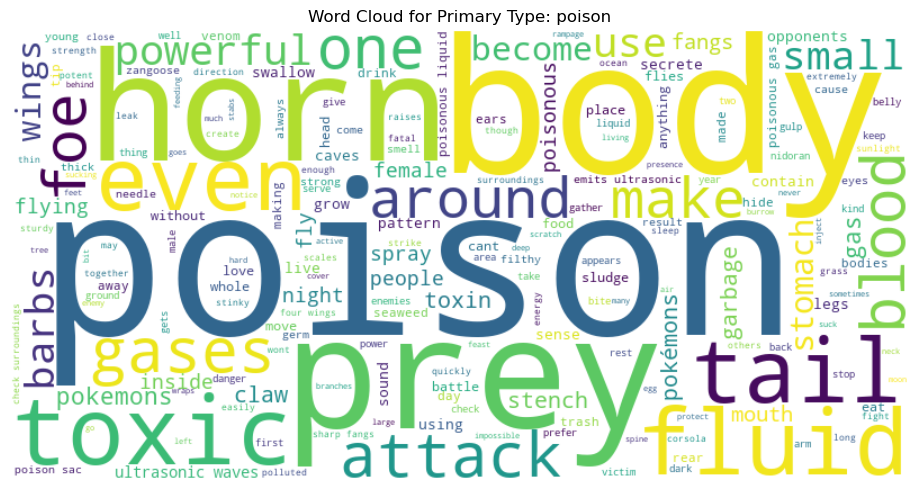

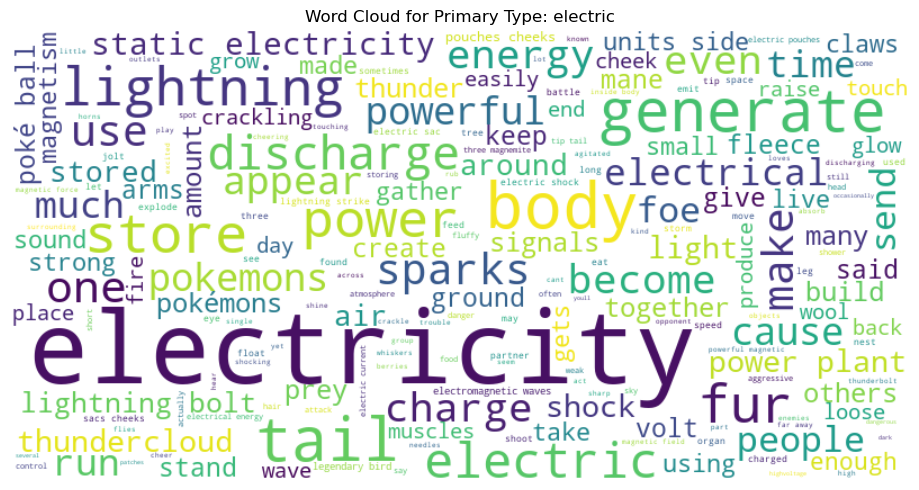

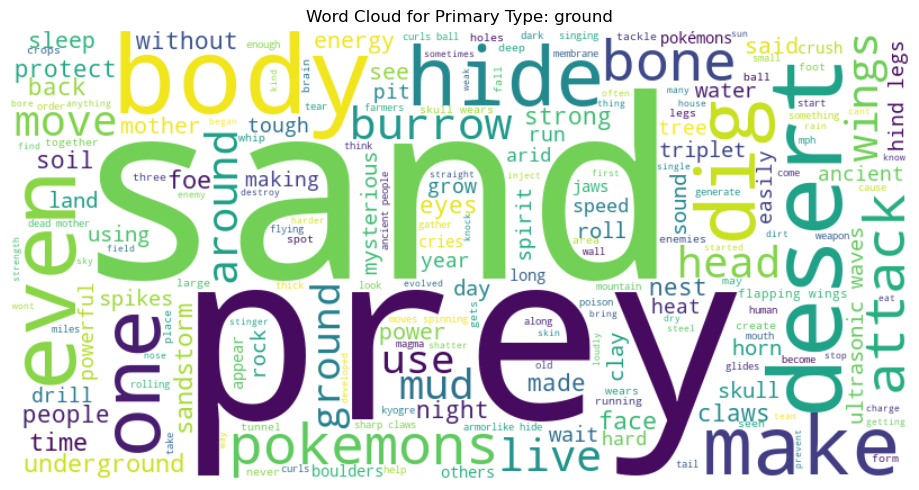

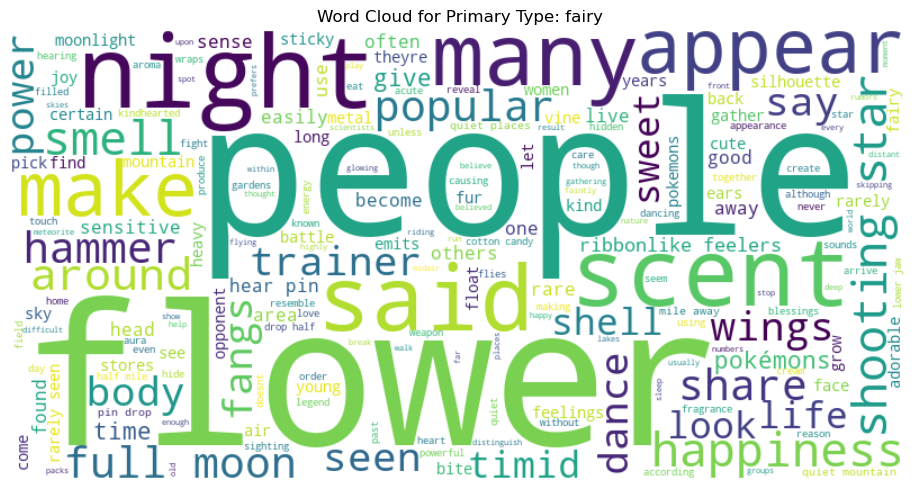

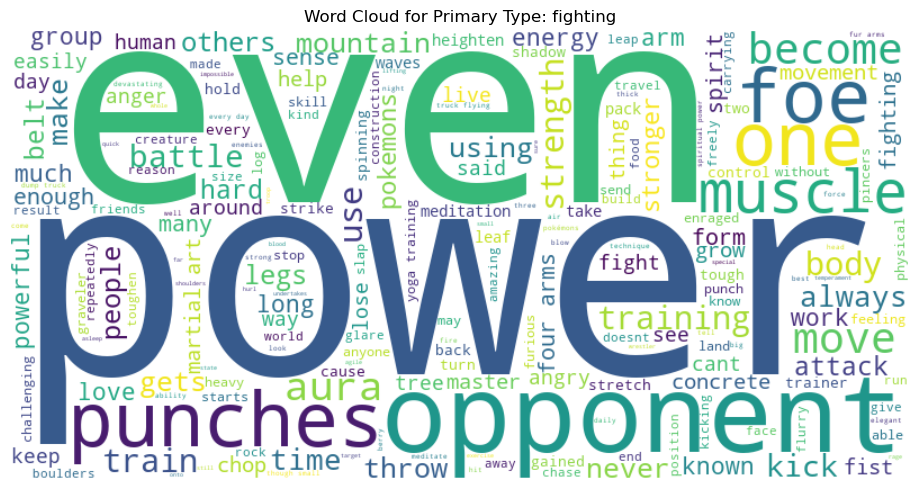

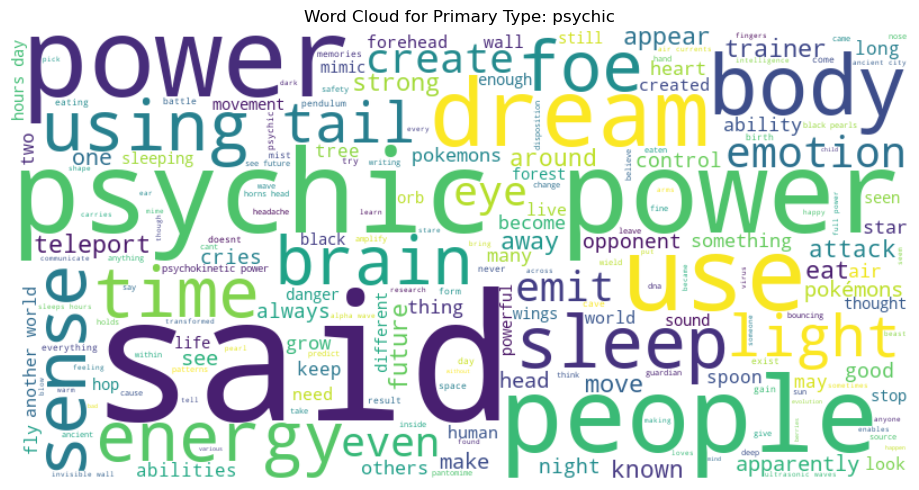

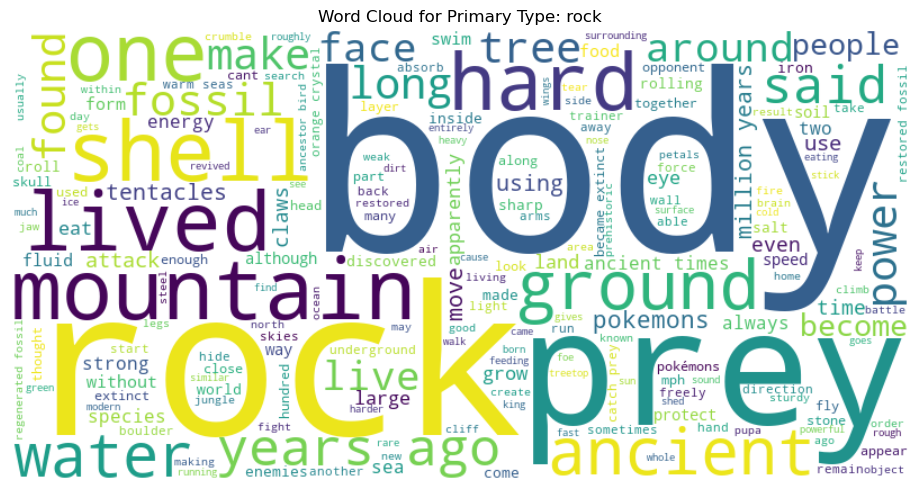

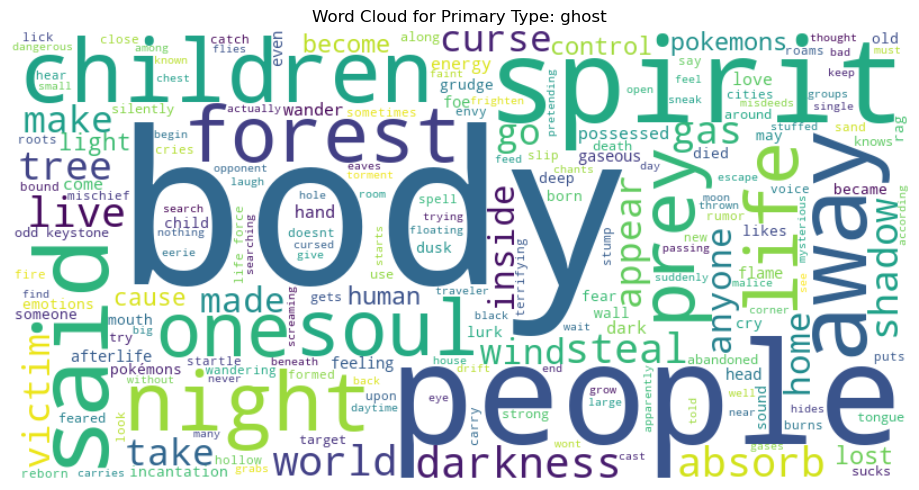

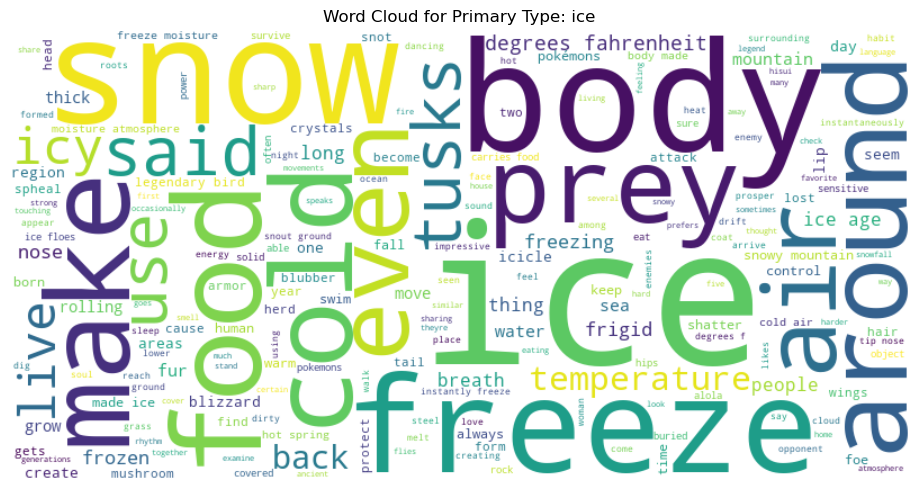

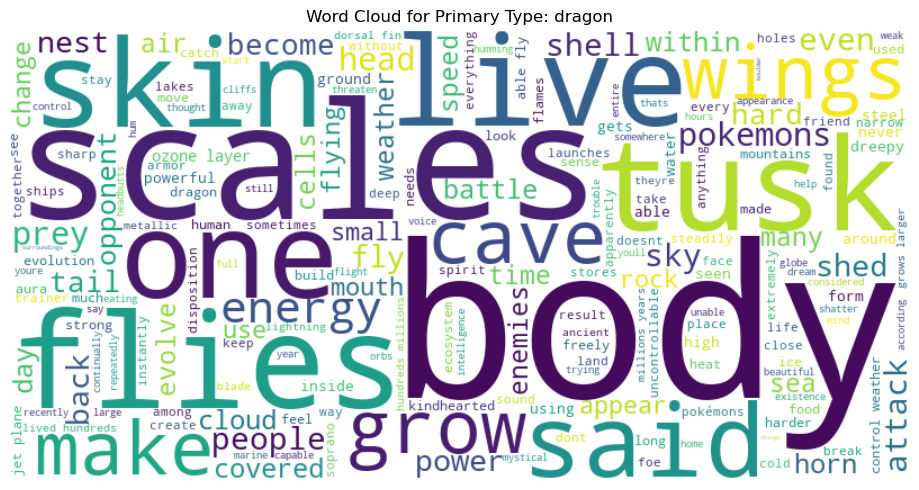

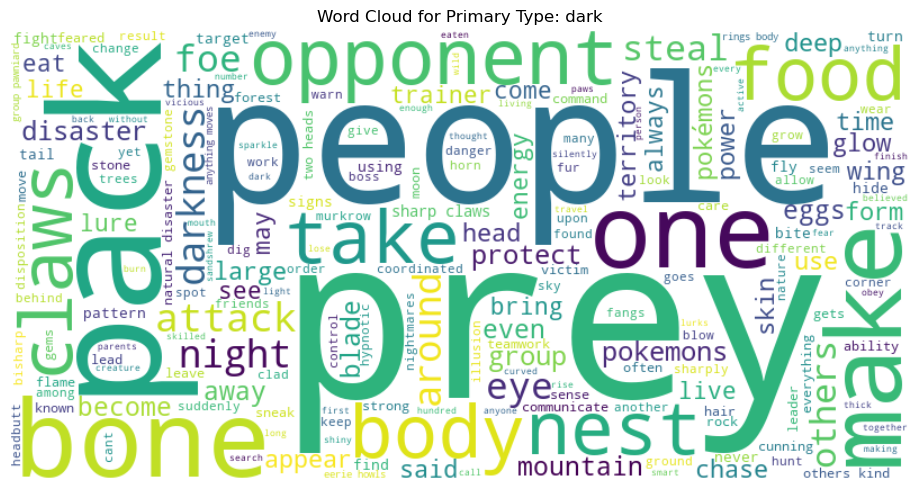

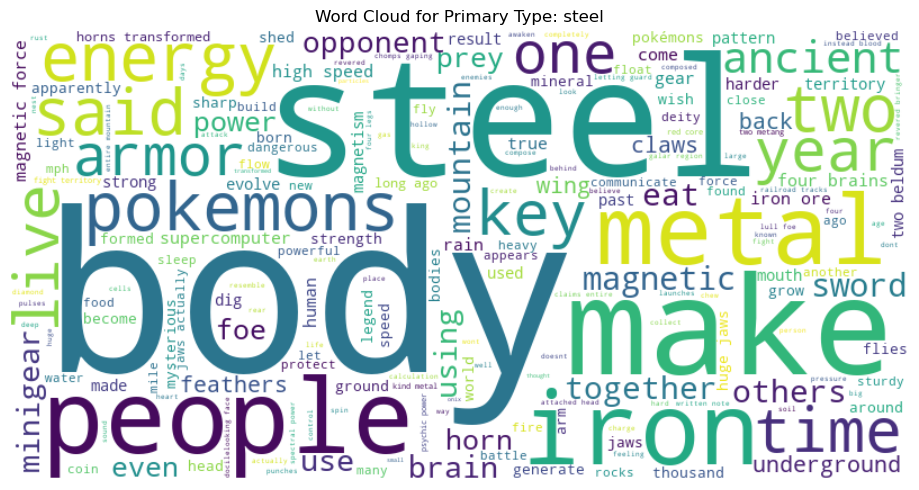

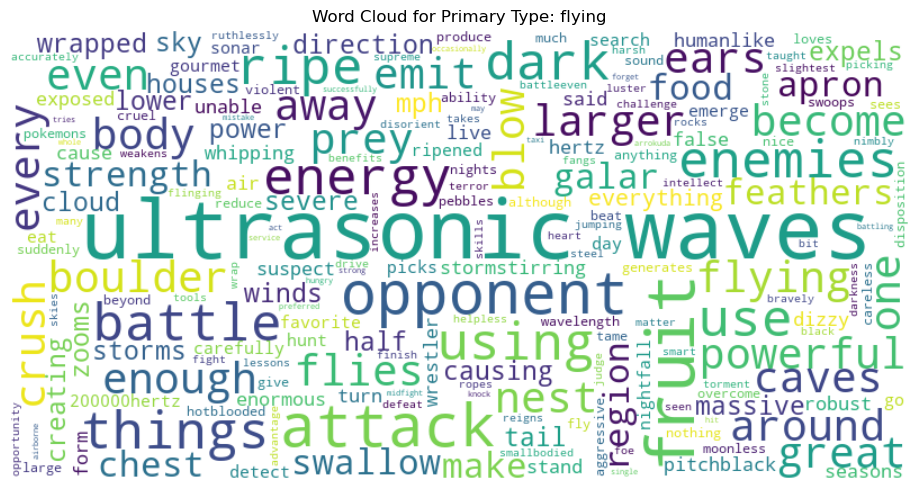


🔹 Top 15 Words in Mono-Type Descriptions:
body: 475
even: 206
tail: 205
power: 193
water: 183
prey: 182
one: 176
people: 169
pokemons: 166
around: 161
electricity: 158
said: 151
like: 145
energy: 126
uses: 120

🔹 Top 15 Words in Dual-Type Descriptions:
body: 402
prey: 358
wings: 206
one: 193
even: 184
people: 182
said: 172
around: 170
pokemons: 153
water: 147
back: 146
power: 138
head: 135
tail: 128
uses: 126


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words.update(['pokemon', 'pokémon'])  # Add 'pokemon' to stopwords

# Load the cleaned dataset
df = pd.read_csv('../Datasets/pokedex_final.csv')  # adjust path if needed

# Clean text: lowercase and remove punctuation
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return ' '.join(word for word in text.split() if word not in stop_words)

# Clean the enhanced info column
df['info_cleaned'] = df['enhanced_info'].apply(clean_text)

# -----------------------------
# 1. Word Cloud by Primary Type
# -----------------------------
unique_types = df['type1'].unique()

for t in unique_types:
    text = ' '.join(df[df['type1'] == t]['info_cleaned'].dropna())
    if text.strip():  # skip empty ones
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"Word Cloud for Primary Type: {t}")
        plt.tight_layout()
        plt.show()

# -------------------------------------
# 2. Frequency Analysis: Mono vs Dual
# -------------------------------------
# Use the existing binary 'is_dual_type' column (0 = Mono, 1 = Dual)
mono_words = ' '.join(df[df['is_dual_type'] == 0]['info_cleaned']).split()
dual_words = ' '.join(df[df['is_dual_type'] == 1]['info_cleaned']).split()

mono_freq = Counter(mono_words)
dual_freq = Counter(dual_words)

# Top 15 words for each category
print("\n🔹 Top 15 Words in Mono-Type Descriptions:")
for word, count in mono_freq.most_common(15):
    print(f"{word}: {count}")

print("\n🔹 Top 15 Words in Dual-Type Descriptions:")
for word, count in dual_freq.most_common(15):
    print(f"{word}: {count}")